In [ ]:
# Import the libraries
import logging
import pandas as pd
import ai
import config
import database as db

In [ ]:
# Вызывать, если row_products пустой
# rep.get_categories(config.row_categories)

row_categories = pd.read_csv(config.row_categories)
row_categories.tail()

,Category ID,Category,Subcategory ID,Subcategory
418,73C9953,Аптечка,73C9955,Презервативы и гели
419,73C9953,Аптечка,73C9956,Пластыри
420,73C9953,Аптечка,73C9957,Кремы
421,73C9953,Аптечка,73C9959,Гигиенические помады
422,73C9953,Аптечка,73C12099,"Витамины, БАДы"


### Удаляем категории, которые не являются пищевой продукцией

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def filter_categories(input_file=config.row_categories, output_file=config.categories):
    drop_categories = [
        "Новый Год",
        "Не забудьте купить",
        "Детские товары",
        "Детское питание",
        "Детский клуб",
        "Бумага и салфетки",
        "Красота и гигиена",
        "Л'Этуаль в Пятёрочке",
        "Для животных",
        "Пушистый клуб",
        "Стирка и уборка",
        "Одежда",
        "Для дома и дачи",
        "Аптечка"
    ]

    try:
        categories = pd.read_csv(input_file)

        filtered_categories = categories[~categories['Category'].isin(drop_categories)]

        filtered_categories.to_csv(output_file, index=False)

    except Exception as e:
        logging.error(f"Failed to filter categories: {e}")

filter_categories()

In [ ]:
categories = pd.read_csv(config.categories)
categories.head()

,Category ID,Category,Subcategory ID,Subcategory
0,73C2338,Готовая еда,73C10301,Горячие напитки
1,73C2338,Готовая еда,73C9714,"Блинчики, сырники и каши"
2,73C2338,Готовая еда,73C9715,Сэндвичи и бургеры
3,73C2338,Готовая еда,73C6771,Суши и роллы
4,73C2338,Готовая еда,73C9718,Основные блюда


In [ ]:
# Вызывать, если row_products пустой
# rep.getProducts(config.categories, config.row_products)
#
row_products = pd.read_csv(config.row_products)
row_products.head()

,plu,name,image_links,uom,step,rating,promo,prices,labels,property_clarification,has_age_restriction,stock_limit,description,description_md,nutrients,attributes,ingredients,is_available,is_various_manufacturers
0,78034281,Кофе Латте 330мл,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.73, 'rates_count': 2087}",{'econombo': {'include_categories': ['251C2161...,"[{'value': '99.99', 'placement_type': 'regular...","[{'label': 'Комбо', 'bg_color': '#FBAC29', 'te...",330 мл,False,100.0,NaN,NaN,"[{'value': '6.84', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.337', 'uom': 'кг'...","молоко с м.д.ж. 3,2%, вода питьевая, кофе нату...",True,True
1,78034282,Кофе Большой Капучино 270мл,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.69, 'rates_count': 1191}",{'econombo': {'include_categories': ['251C2161...,"[{'value': '99.99', 'placement_type': 'regular...","[{'label': 'Комбо', 'bg_color': '#FBAC29', 'te...",270 мл,False,100.0,NaN,NaN,"[{'value': '5.25', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.277', 'uom': 'кг'...","молоко с м.д.ж. 3,2%, вода питьевая, кофе нату...",True,True
2,78034285,Кофе Американо Гранде 320мл,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.69, 'rates_count': 518}",{'econombo': {'include_categories': ['251C2161...,"[{'value': '79.99', 'placement_type': 'regular...","[{'label': 'Комбо', 'bg_color': '#FBAC29', 'te...",320 мл,False,100.0,NaN,NaN,"[{'value': '0.47', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.32', 'uom': 'кг'}...","вода питьевая, кофе натуральный жареный в зернах",True,True
3,78034280,Кофе Флэт Уайт 200мл,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.56, 'rates_count': 339}",{'econombo': {'include_categories': ['251C2161...,"[{'value': '99.99', 'placement_type': 'regular...","[{'label': 'Комбо', 'bg_color': '#FBAC29', 'te...",200 мл,False,100.0,NaN,NaN,"[{'value': '4.81', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.205', 'uom': 'кг'...","молоко с м.д.ж. 3,2%, вода питьевая, кофе нату...",True,True
4,78034284,Кофе Большой Американо 230мл,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.8, 'rates_count': 198}",{'econombo': {'include_categories': ['251C2161...,"[{'value': '49.99', 'placement_type': 'regular...","[{'label': 'Комбо', 'bg_color': '#FBAC29', 'te...",230 мл,False,100.0,NaN,NaN,"[{'value': '0.41', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.23', 'uom': 'кг'}...","вода питьевая, кофе натуральный жареный в зернах",True,True


### Удаляем поля продуктов, которые не нужны

In [ ]:
def filter_product_fields(input_file=config.row_products, output_file=config.products):
    # Список полей, которые нужно исключить
    drop_fields = [
        "image_links",
        "promo",
        "labels",
        "has_age_restriction",
        "stock_limit",
        "description",
        "description_md",
        "attributes",
        "is_available",
        "is_various_manufacturers"
    ]

    try:
        products = pd.read_csv(input_file)

        filtered_products = products.drop(columns=drop_fields, errors='ignore')

        filtered_products.to_csv(output_file, index=False)
        logging.info(f"Filtered products saved to {output_file}")

    except Exception as e:
        logging.error(f"Failed to filter product fields: {e}")

filter_product_fields()

2024-12-13 18:02:21,356 - INFO - Filtered products saved to products.csv


In [ ]:
products = pd.read_csv(config.products)
products.head()

,plu,name,uom,step,rating,prices,property_clarification,nutrients,ingredients
0,78034281,Кофе Латте 330мл,шт,1.0,"{'rating_average': 4.73, 'rates_count': 2087}","[{'value': '99.99', 'placement_type': 'regular...",330 мл,"[{'value': '6.84', 'text': 'белки'}, {'value':...","молоко с м.д.ж. 3,2%, вода питьевая, кофе нату..."
1,78034282,Кофе Большой Капучино 270мл,шт,1.0,"{'rating_average': 4.69, 'rates_count': 1191}","[{'value': '99.99', 'placement_type': 'regular...",270 мл,"[{'value': '5.25', 'text': 'белки'}, {'value':...","молоко с м.д.ж. 3,2%, вода питьевая, кофе нату..."
2,78034285,Кофе Американо Гранде 320мл,шт,1.0,"{'rating_average': 4.69, 'rates_count': 518}","[{'value': '79.99', 'placement_type': 'regular...",320 мл,"[{'value': '0.47', 'text': 'белки'}, {'value':...","вода питьевая, кофе натуральный жареный в зернах"
3,78034280,Кофе Флэт Уайт 200мл,шт,1.0,"{'rating_average': 4.56, 'rates_count': 339}","[{'value': '99.99', 'placement_type': 'regular...",200 мл,"[{'value': '4.81', 'text': 'белки'}, {'value':...","молоко с м.д.ж. 3,2%, вода питьевая, кофе нату..."
4,78034284,Кофе Большой Американо 230мл,шт,1.0,"{'rating_average': 4.8, 'rates_count': 198}","[{'value': '49.99', 'placement_type': 'regular...",230 мл,"[{'value': '0.41', 'text': 'белки'}, {'value':...","вода питьевая, кофе натуральный жареный в зернах"


In [ ]:
db.save_filtered_products(config.products, config.processed_products)

processed_products = pd.read_csv(config.processed_products)
processed_products.head()

,Product Name,PLU,UOM,Step,Rating,Rates Count,Price,Property Clarification,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories,Ingredients
0,Кофе Латте 330мл,78034281,шт,1.0,4.73,2087,99.99,330 мл,330.0,6.84,6.85,9.65,127.61,"молоко с м.д.ж. 3,2%, вода питьевая, кофе нату..."
1,Кофе Большой Капучино 270мл,78034282,шт,1.0,4.69,1191,99.99,270 мл,270.0,5.25,5.26,7.17,97.02,"молоко с м.д.ж. 3,2%, вода питьевая, кофе нату..."
2,Кофе Американо Гранде 320мл,78034285,шт,1.0,4.69,518,79.99,320 мл,320.0,0.47,0.48,0.11,6.64,"вода питьевая, кофе натуральный жареный в зернах"
3,Кофе Флэт Уайт 200мл,78034280,шт,1.0,4.56,339,99.99,200 мл,200.0,4.81,4.83,6.49,88.67,"молоко с м.д.ж. 3,2%, вода питьевая, кофе нату..."
4,Кофе Большой Американо 230мл,78034284,шт,1.0,4.80,198,49.99,230 мл,230.0,0.41,0.42,0.09,5.78,"вода питьевая, кофе натуральный жареный в зернах"


In [ ]:
processed_products.describe()

,PLU,Step,Rating,Rates Count,Price,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories
count,3.473000e+03,3473.000000,3473.000000,3473.000000,2520.000000,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000
mean,4.662232e+06,0.972373,4.886674,7852.321048,147.528286,1005.495825,6.511566,12.536847,26.749225,246.489369
std,9.028426e+06,0.156552,0.064112,16665.196342,150.167971,16883.617263,7.141616,18.677836,27.865209,193.125831
min,2.500000e+01,0.100000,4.210000,11.000000,5.990000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.437861e+06,1.000000,4.870000,2393.000000,65.990000,100.000000,0.500000,0.200000,3.000000,64.000000
50%,4.064355e+06,1.000000,4.910000,4875.000000,107.990000,210.000000,5.000000,5.300000,12.100000,232.000000
75%,4.289896e+06,1.000000,4.930000,8769.000000,175.990000,425.000000,9.500000,19.200000,53.000000,379.000000
max,7.803546e+07,3.000000,5.000000,399972.000000,2299.000000,947000.000000,87.000000,483.000000,100.000000,2145.000000


### У части товаров не было weight и пришлось эти данные приставить в ручную

In [ ]:
processed_products.Weight.value_counts()

Weight
200.0    317
500.0    181
400.0    155
100.0    154
250.0    152
        ... 
61.0       1
514.0      1
571.0      1
202.0      1
473.0      1
Name: count, Length: 241, dtype: int64

### Оценить продукты с помощью GigaChat

In [ ]:
ai.process_products(config.processed_products, config.products_with_scores)

In [ ]:
products_with_scores = pd.read_csv(config.products_with_scores)
products_with_scores.head()

,Product Name,PLU,UOM,Step,Rating,Rates Count,Price,Property Clarification,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories,Score
0,Кофе Латте 330мл,78034281,шт,1.0,4.73,2087,99.99,330 мл,330.0,6.84,6.85,9.65,127.61,7.00
1,Кофе Большой Капучино 270мл,78034282,шт,1.0,4.69,1191,99.99,270 мл,270.0,5.25,5.26,7.17,97.02,6.33
2,Кофе Американо Гранде 320мл,78034285,шт,1.0,4.69,518,79.99,320 мл,320.0,0.47,0.48,0.11,6.64,5.00
3,Кофе Флэт Уайт 200мл,78034280,шт,1.0,4.56,339,99.99,200 мл,200.0,4.81,4.83,6.49,88.67,8.00
4,Кофе Большой Американо 230мл,78034284,шт,1.0,4.80,198,49.99,230 мл,230.0,0.41,0.42,0.09,5.78,5.67


In [ ]:
products_with_scores.Weight.value_counts()

Weight
200.0    329
500.0    189
100.0    154
400.0    154
250.0    152
        ... 
221.0      1
282.0      1
51.0       1
550.0      1
473.0      1
Name: count, Length: 245, dtype: int64

Saving products_with_scores.csv to products_with_scores.csv
Количество строк до удаления дубликатов: 3478
Количество строк после удаления дубликатов: 3463
Очищенный файл сохранён в: /content/products_with_scores_cleaned.csv


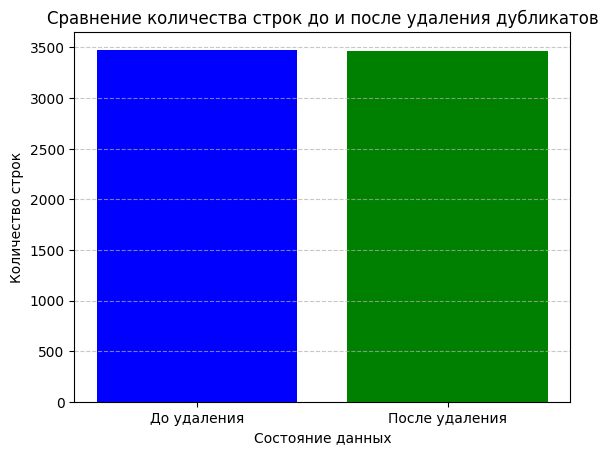

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Чтение данных из CSV
file_path = '/content/products_with_scores.csv'
df = pd.read_csv(file_path)

df_cleaned=df.drop_duplicates ()

# Проверка, удалились ли дубликаты
print(f"Количество строк до удаления дубликатов: {len(df)}")
print(f"Количество строк после удаления дубликатов: {len(df_cleaned)}")

output_file_path = '/content/products_with_scores_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)

# Подсчёт количества строк до и после
rows_before = len(df)
rows_after = len(df_cleaned)

# Сохранение очищенного DataFrame в файл .csv
output_file_path = '/content/products_with_scores_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)

print(f"Очищенный файл сохранён в: {output_file_path}")

# Построение графика
plt.bar(['До удаления', 'После удаления'], [rows_before, rows_after], color=['blue', 'green'])
plt.title('Сравнение количества строк до и после удаления дубликатов')
plt.ylabel('Количество строк')
plt.xlabel('Состояние данных')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

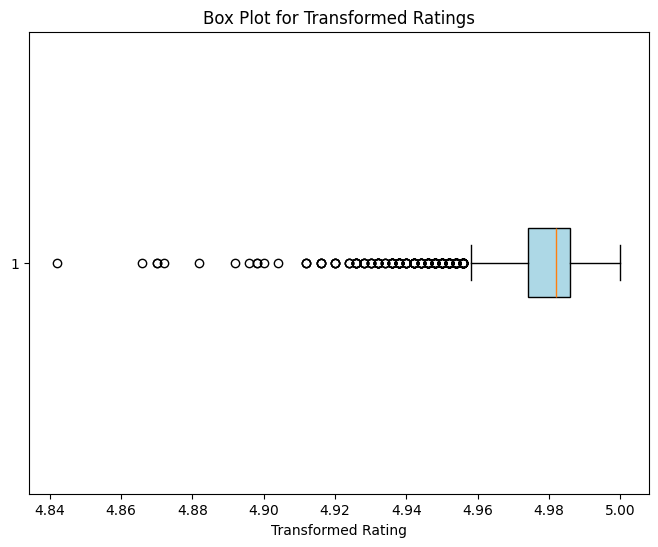

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/products_with_scores_cleaned.csv'
data = pd.read_csv(file_path)

# Убедимся, что столбцы Rating и Rates Count существуют
if 'Rating' not in data.columns or 'Rates Count' not in data.columns:
    raise ValueError("Столбцы 'Rating' и/или 'Rates Count' отсутствуют в CSV файле.")

# Проверяем, что значения Rating находятся в диапазоне от 0 до 5
if not data['Rating'].between(0, 5).all():
    raise ValueError("Некоторые значения в 'Rating' выходят за пределы диапазона 0-5.")

# Преобразование значений из диапазона [0, 5] в [4, 5]
data['Transformed Rating'] = 4 + (data['Rating'] / 5)

# Вычисление веса каждой оценки на основе Rates Count
data['Rating Weight'] = data['Rates Count'] / data['Rates Count'].sum()

# Сохранение преобразованных данных (если необходимо)
data.to_csv('transformed_data.csv', index=False)

# Построение box plot для анализа нового столбца Transformed Rating
plt.figure(figsize=(8, 6))
plt.boxplot(data['Transformed Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot for Transformed Ratings')
plt.xlabel('Transformed Rating')
plt.show()




Интерпретация:  
Центральное положение (медиана): Указывает, где находится середина нормализованных оценок.  
Диапазон данных: Показывает, насколько значения рейтинга близки друг к другу или разбросаны.  
Выбросы: Выявляет отдельные значения, которые выделяются из общего распределения.  
Если график симметричен и усы короткие, это говорит о равномерности распределения. Если ящик смещен или присутствует множество выбросов, это указывает на смещение в данных или необычные значения.

Можно заявить, что представленные на сайте Пятёрочки оценки пользователей не являются релевантными и не могут служить оценкой качества конкретного продукта

Количество строк до очистки: 3463
Количество строк после очистки: 3463


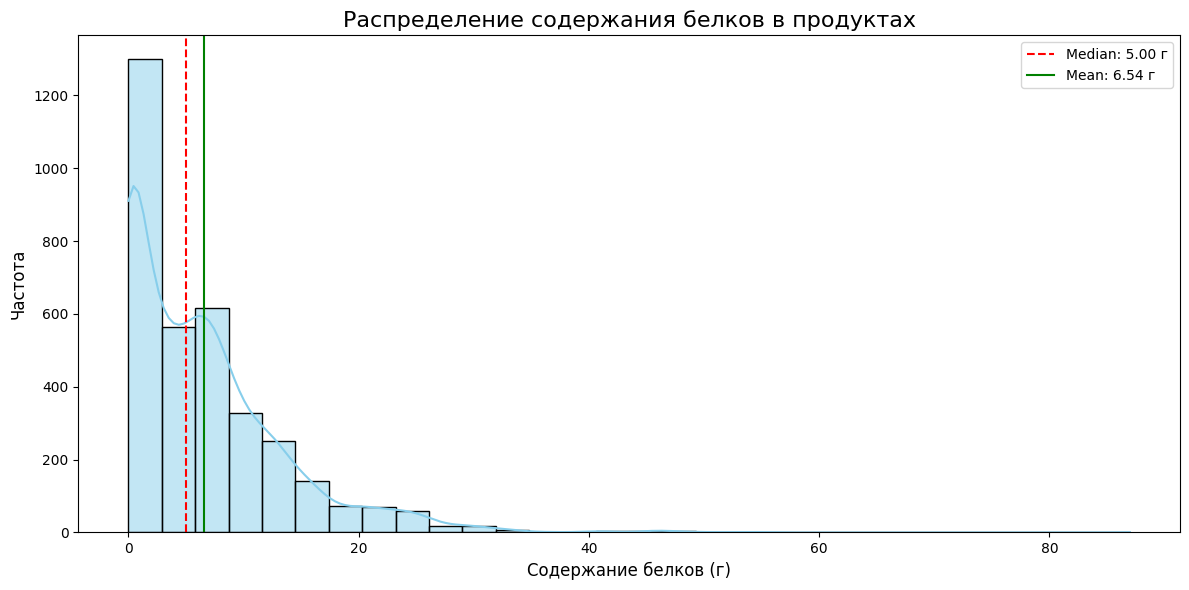

Описание распределения данных для столбца 'Nutrients Protein':
Среднее значение: 6.54 г
Медиана: 5.00 г
Минимальное значение: 0.00 г
Максимальное значение: 87.00 г
Стандартное отклонение: 7.15 г


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Nutrients Protein'], kde=True, bins=30, color='skyblue')

# Вычисление медианы и среднего значения
median_value = df_clean['Nutrients Protein'].median()
mean_value = df_clean['Nutrients Protein'].mean()

# Добавление медианы на график
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('Распределение содержания белков в продуктах', fontsize=16)
plt.xlabel('Содержание белков (г)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Protein':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Protein'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Protein'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Protein'].std():.2f} г")


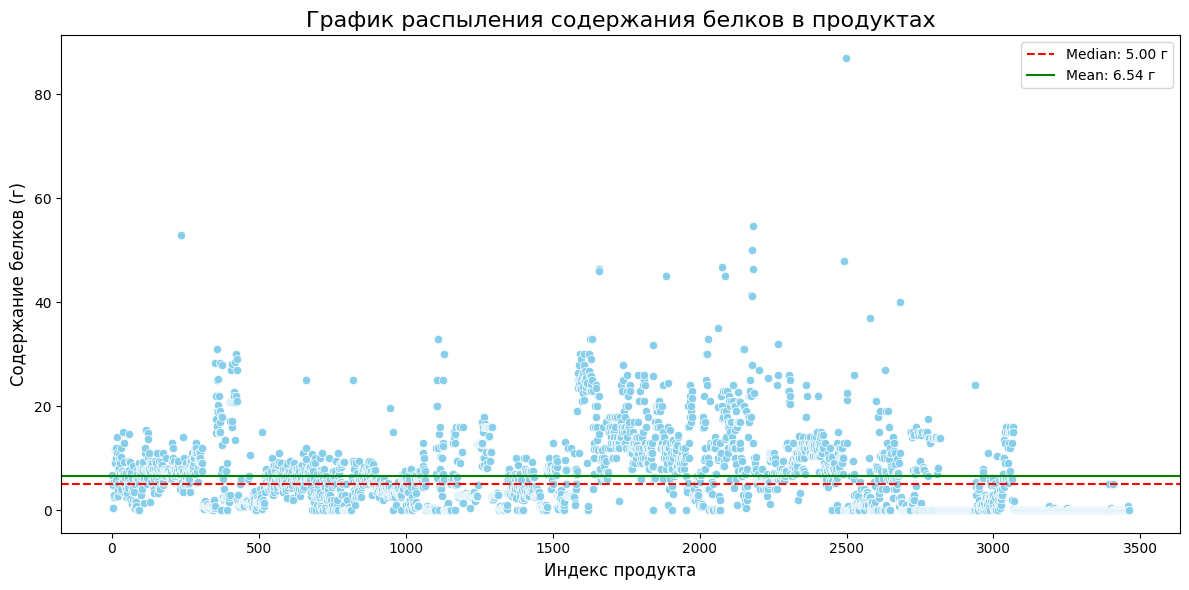

Описание распределения данных для столбца 'Nutrients Protein':
Среднее значение: 6.54 г
Медиана: 5.00 г
Минимальное значение: 0.00 г
Максимальное значение: 87.00 г
Стандартное отклонение: 7.15 г


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Убираем строки с некорректными значениями (если есть NaN)
df_clean = df.dropna(subset=['Nutrients Protein'])

# Построение графика распыления
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean.index, y=df_clean['Nutrients Protein'], color='skyblue')

# Добавление медианы и среднего значения на график
median_value = df_clean['Nutrients Protein'].median()
mean_value = df_clean['Nutrients Protein'].mean()

# Медиана и среднее как горизонтальные линии
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axhline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('График распыления содержания белков в продуктах', fontsize=16)
plt.xlabel('Индекс продукта', fontsize=12)
plt.ylabel('Содержание белков (г)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Protein':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Protein'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Protein'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Protein'].std():.2f} г")


In [45]:
products_above_40 = df_clean[df_clean['Nutrients Protein'] > 40]

# Выводим имена продуктов с содержанием белка больше 40
print("Продукты с содержанием белков выше 40 г:")
print(products_above_40['Product Name'])

Продукты с содержанием белков выше 40 г:
234     Мини-кексы Юбилейное с кусочками молочного шок...
1656                   Сыр Сырцееды копченый 30% БЗМЖ 23г
1658    Сыр Сырцееды копченый со вкусом томата 30% БЗМ...
1886    Мясной продукт Мясо так мясо Слайсы классическ...
2075       Минтай Fish House вяленый соломка c перцем 70г
2086                       Лещ Царский Посол вяленый 300г
2176       Полосатик Fish House желтый сушено-вяленый 40г
2177    Соломка рыбная Флотская со вкусом стейка солен...
2178                       Ставридка Сухогруз сушеная 70г
2179    Соломка рыбная Флотская Васаби солено-сушеная 15г
2181           Анчоус Тиксы столефорус сушено-вяленый 36г
2182          Вобла Fish House вяленая неразделанная 200г
2491             Дрожжи Angel сухие быстродействующие 11г
2498                         Желатин Рестория пищевой 10г
Name: Product Name, dtype: object


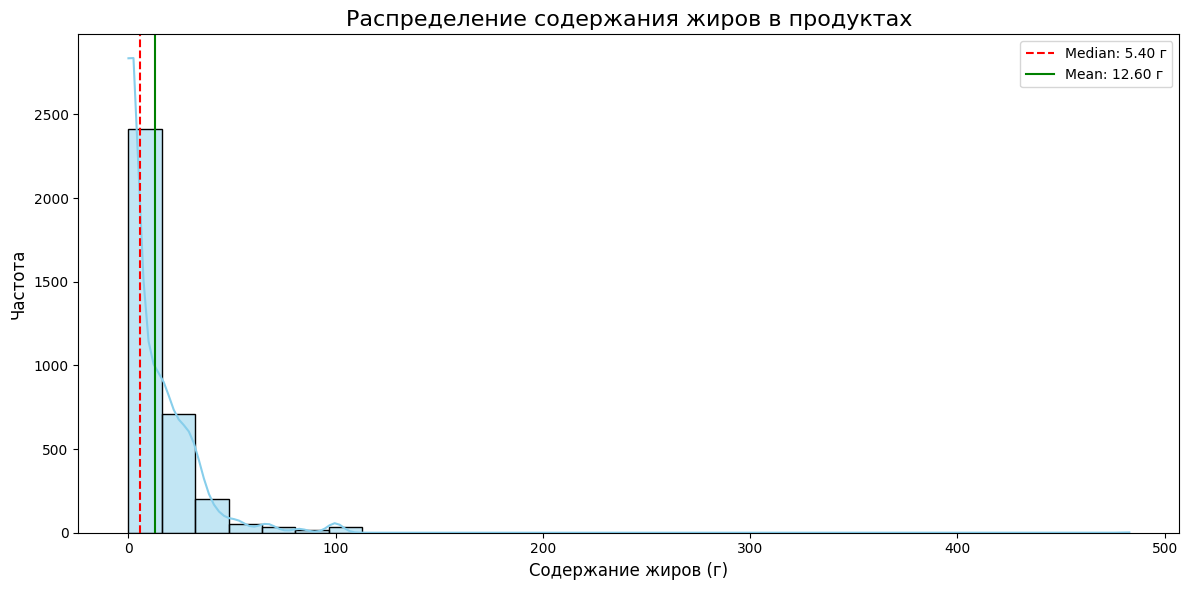

Описание распределения данных для столбца 'Nutrients Fat':
Среднее значение: 12.60 г
Медиана: 5.40 г
Минимальное значение: 0.00 г
Максимальное значение: 483.00 г
Стандартное отклонение: 18.70 г


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Nutrients Fat'], kde=True, bins=30, color='skyblue')

# Вычисление медианы и среднего значения
median_value = df_clean['Nutrients Fat'].median()
mean_value = df_clean['Nutrients Fat'].mean()

# Добавление медианы на график
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('Распределение содержания жиров в продуктах', fontsize=16)
plt.xlabel('Содержание жиров (г)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Fat':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Fat'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Fat'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Fat'].std():.2f} г")

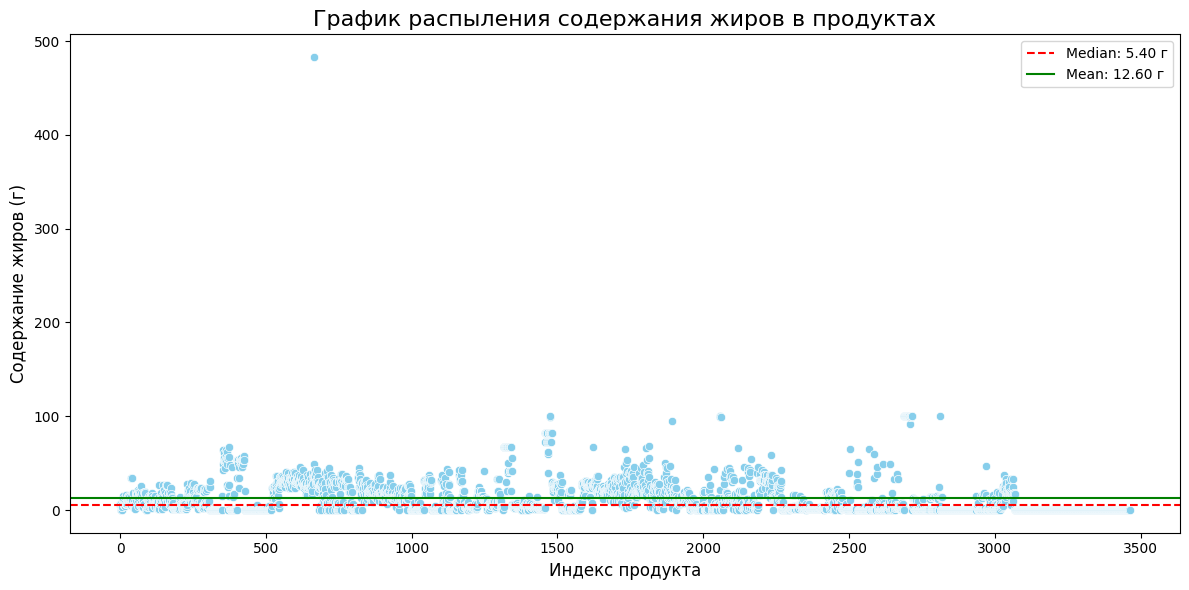

Описание распределения данных для столбца 'Nutrients Fat':
Среднее значение: 12.60 г
Медиана: 5.40 г
Минимальное значение: 0.00 г
Максимальное значение: 483.00 г
Стандартное отклонение: 18.70 г


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Убираем строки с некорректными значениями (если есть NaN)
df_clean = df.dropna(subset=['Nutrients Fat'])

# Построение графика распыления
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean.index, y=df_clean['Nutrients Fat'], color='skyblue')

# Добавление медианы и среднего значения на график
median_value = df_clean['Nutrients Fat'].median()
mean_value = df_clean['Nutrients Fat'].mean()

# Медиана и среднее как горизонтальные линии
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axhline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('График распыления содержания жиров в продуктах', fontsize=16)
plt.xlabel('Индекс продукта', fontsize=12)
plt.ylabel('Содержание жиров (г)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Fat':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Fat'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Fat'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Fat'].std():.2f} г")

In [52]:
products_above_90 = df_clean[df_clean['Nutrients Fat'] > 90]

# Выводим имена продуктов с содержанием жиров больше 90
print("Продукты с содержанием жиров выше 90 г:")
print(products_above_90['Product Name'])

products_above_300 = df_clean[df_clean['Nutrients Fat'] > 300]

# Выводим имена продуктов с содержанием жиров больше 300
print("Продукты с содержанием жиров выше 300 г:")
print(products_above_300['Product Name'])

Продукты с содержанием жиров выше 90 г:
665                Конфеты Raffaello Миндаль и кокос 150г
1475       Масло топленое ГХИ Вкус & Польза 99% БЗМЖ 140г
1476                        Масло Delicato кокосовое 200г
1892          Сало Золотой Кабанчик По-деревенски соленое
2058    Масло Вкус & Польза кунжутное нерафинированное...
2059    Масло Вкус & Польза авокадо нерафинированное х...
2060    Масло Вкус & Польза из семян тыквенной семечки...
2690    Масло подсолнечное Слобода рафинированное дезо...
2691    Масло Altero подсолнечное с добавлением оливко...
2692    Масло Красная цена подсолнечное рафинированное...
2693    Масло Золотая семечка подсолнечное рафинирован...
2694       Масло подсолнечное Слобода рафинированное 1.8л
2695    Масло Золотая Семечка подсолнечное рафинирован...
2696    Масло Олейна подсолнечное рафинированное дезод...
2697    Масло подсолнечное Благо дезодорированное вымо...
2698    Масло Селяночка подсолнечное рафинированное де...
2699    Масло Селяночка подсолне

Обнаружен вброс по содержанию жиров в продукте Конфеты Raffaello Миндаль и кокс 150 г

In [55]:
import pandas as pd

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'  # Укажите путь к вашему файлу
df = pd.read_csv(file_path)

# Проверка, что столбцы 'Product Name' и 'Nutrients Fat' существуют
if 'Product Name' in df.columns and 'Nutrients Fat' in df.columns:

    # Находим индекс строки, где 'Product Name' равен 'Конфеты Raffaello Миндаль и кокос 150г'
    product_name = 'Конфеты Raffaello Миндаль и кокос 150г'

    # Изменяем значение в столбце 'Nutrients Fat' для найденного продукта
    df.loc[df['Product Name'] == product_name, 'Nutrients Fat'] = 23

    # Проверка значений в столбце 'Nutrients Fat' и замена значений больше 300 на None
    if (df['Nutrients Fat'] > 300).any():
        print("Внимание! В столбце 'Nutrients Fat' найдены значения выше 300. Они будут заменены на None.")
        df.loc[df['Nutrients Fat'] > 300, 'Nutrients Fat'] = None  # Можно также заменить на другие значения, если нужно

    # Проверяем изменения
    updated_row = df[df['Product Name'] == product_name]
    print("Обновленная информация для продукта:")
    print(updated_row)

    # Сохранение обновленного DataFrame в файл CSV
    output_file_path = '/content/products_with_scores_cleaned_updated.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Обновленный файл сохранен в: {output_file_path}")
else:
    print("Один из столбцов не найден в файле.")



Обновленная информация для продукта:
                               Product Name    PLU UOM  Step  Rating  \
665  Конфеты Raffaello Миндаль и кокос 150г  18162  шт   1.0    4.95   

     Rates Count   Price Property Clarification  Weight  Nutrients Protein  \
665         7477  339.99                  150 г   150.0                7.4   

     Nutrients Fat  Nutrients Carbs  Nutrients Calories  Score  
665           23.0             38.6               627.0   3.33  
Обновленный файл сохранен в: /content/products_with_scores_cleaned_updated.csv


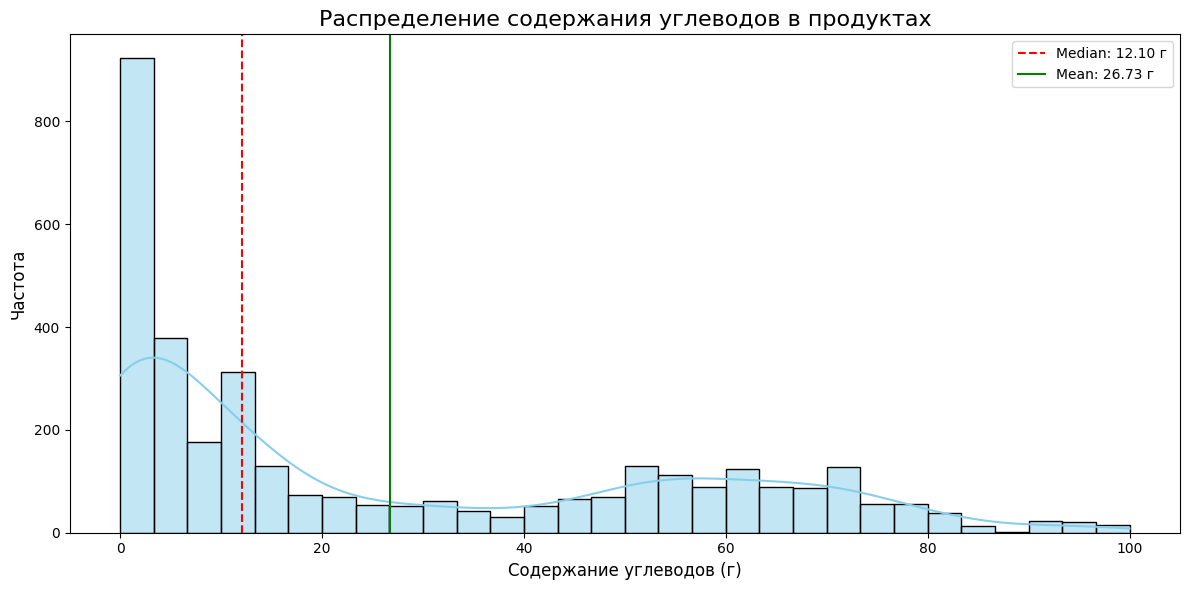

Описание распределения данных для столбца 'Nutrients Carbs':
Среднее значение: 26.73 г
Медиана: 12.10 г
Минимальное значение: 0.00 г
Максимальное значение: 100.00 г
Стандартное отклонение: 27.90 г


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned_updated.csv'
df = pd.read_csv(file_path)

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Nutrients Carbs'], kde=True, bins=30, color='skyblue')

# Вычисление медианы и среднего значения
median_value = df_clean['Nutrients Carbs'].median()
mean_value = df_clean['Nutrients Carbs'].mean()

# Добавление медианы на график
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('Распределение содержания углеводов в продуктах', fontsize=16)
plt.xlabel('Содержание углеводов (г)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Carbs':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Carbs'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Carbs'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Carbs'].std():.2f} г")

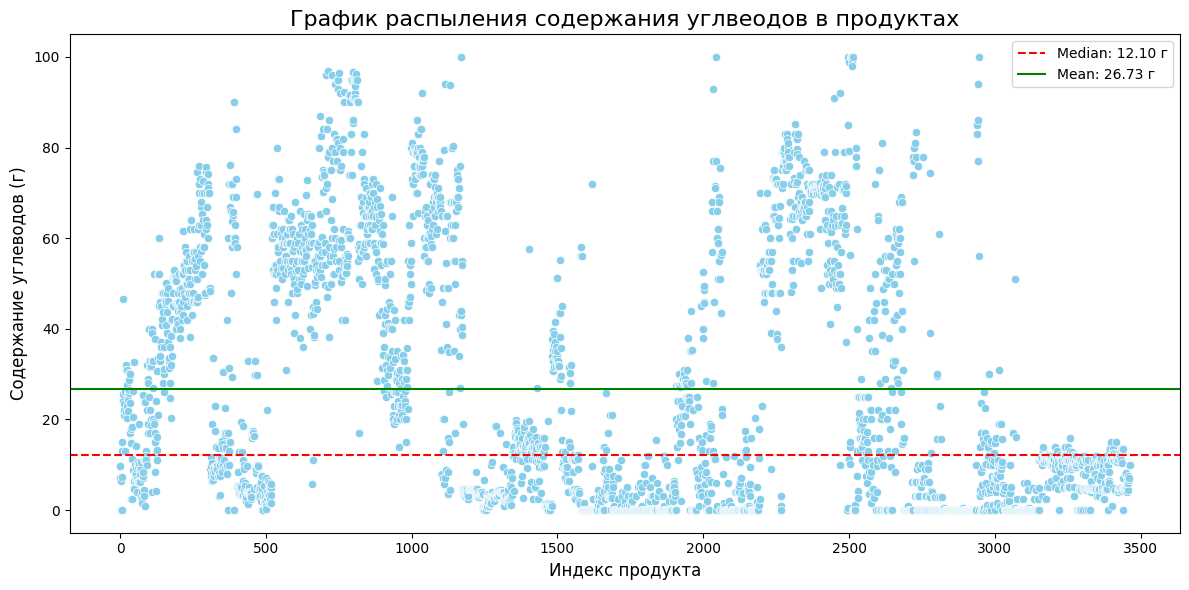

Описание распределения данных для столбца 'Nutrients Carbs':
Среднее значение: 26.73 г
Медиана: 12.10 г
Минимальное значение: 0.00 г
Максимальное значение: 100.00 г
Стандартное отклонение: 27.90 г


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned_updated.csv'
df = pd.read_csv(file_path)

# Убираем строки с некорректными значениями (если есть NaN)
df_clean = df.dropna(subset=['Nutrients Carbs'])

# Построение графика распыления
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean.index, y=df_clean['Nutrients Carbs'], color='skyblue')

# Добавление медианы и среднего значения на график
median_value = df_clean['Nutrients Carbs'].median()
mean_value = df_clean['Nutrients Carbs'].mean()

# Медиана и среднее как горизонтальные линии
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axhline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('График распыления содержания углвеодов в продуктах', fontsize=16)
plt.xlabel('Индекс продукта', fontsize=12)
plt.ylabel('Содержание углеводов (г)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Carbs':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Carbs'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Carbs'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Carbs'].std():.2f} г")

На данной диаграмме особенно видно, как дата сет создавался основываясь на категориях товаров

In [66]:
import pandas as pd

# Чтение данных из обновленного CSV
file_path = '/content/products_with_scores_cleaned_updated.csv'
df = pd.read_csv(file_path)

# Устанавливаем максимальное количество строк для отображения
pd.set_option('display.max_rows', 100)

# Проверяем, что столбец 'Nutrients Carbs' существует
if 'Nutrients Carbs' in df.columns:


# Фильтрация продуктов с содержанием углеводов выше 85
    products_above_85 = df[df['Nutrients Carbs'] > 85]

    # Выводим имена продуктов с содержанием углеводов больше 85
    if not products_above_85.empty:
        print("Продукты с содержанием углеводов выше 85 г:")
        print(products_above_85['Product Name'])
    else:
        print("Нет продуктов с содержанием углеводов выше 85 г.")
else:
    print("Столбец 'Nutrients Carbs' не найден в файле.")


Продукты с содержанием углеводов выше 85 г:
391                    Цукаты Mixbar Ананас и папайя 150г
687                         Конфеты Красная цена Молочные
705     Карамель Красная цена Ассорти Яблоко, лимон и ...
714                                 Карамель Леденцы Мини
718              Конфеты Шарлиз желейные со вкусом лимона
727             Карамель Mixbar Ассорти Вкусов на палочке
738     Карамель Невский кондитер малина со сливками с...
743                   Леденцы Бон Пари Фруктовый Микс 75г
746     Карамель Mixbar с начинкой жевательное ассорти...
747                     Карамель Рот Фронт Лимончики 250г
749     Карамель леденцовая Красная цена Ягодный край ...
753          Карамель Рот Фронт Клубника со сливками 250г
767     Набор Lenco Ассорти №5 карамель леденцовая с м...
769     Конфеты Flavimento жевательные с добавлением н...
786                     Драже Skittles Фруктовый вкус 38г
789                 Драже Skittles с фруктовым вкусом 70г
790                         

Предположительно найден вброс для продукта: Чай травяной Honey Kid яблоко, липовый цвет и мелисса с 4 месяцев 85г
При дальнейшем исследовании информации выяснилось, что описание продукта соответствует товарной карточке

https://irecommend.ru/content/chai-kotoryi-pritvoryaetsya-poleznym-produktom-ne-rekomenduyu-dlya-rebenka-no-ya-nashla-emu